In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [22]:
health_df = pd.read_csv('./final.csv',index_col=False)
health_df.drop(['Unnamed: 0'], axis=1,inplace = True)
health_df.drop(['id'], axis=1,inplace = True)

All Important features are stored in file named final.csv, whose contents look like below.

In [27]:
health_df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,age_class,glucose_class
0,1,0,1,1,3,1,1.004893,2,1,3,2
1,0,0,0,1,1,0,-0.099142,0,1,2,2
2,1,0,1,1,3,0,0.472358,0,1,3,0
3,0,0,0,1,3,1,0.719142,3,1,2,1
4,0,1,0,1,1,0,-0.631677,0,1,3,1


__Splitting dataset__

In [35]:
y = health_df['stroke']
x = health_df.drop('stroke' , axis = 1)

In [38]:
oversample = SMOTE(sampling_strategy='all')
X_over, y_over = oversample.fit_resample(x, y)

__Train Test Validate__

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=21)

__Model Training__ : Random Forest Classifier

In [77]:
rf = RandomForestClassifier(n_estimators= 40,max_depth=30, criterion = "entropy")
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=40)

__Model Testing__

In [78]:
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]


print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

Accuracy: 0.8852880658436214
ROC AUC Score: 0.9455422794117647


__Evaluation Metrics__

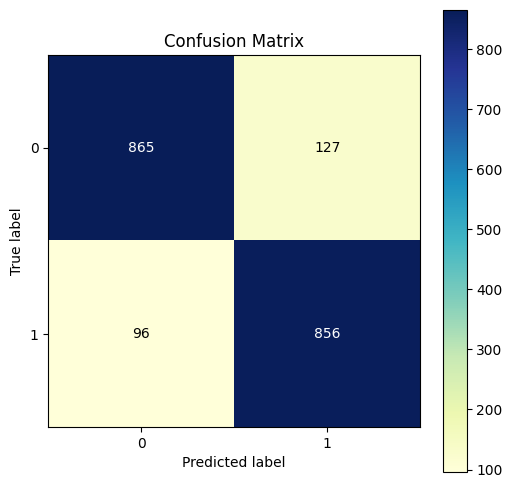

In [79]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');

__Hyper Parameter Tuning__  

Had used RandomSampler to oversample, but the model was giving accuracy of 0.97 which clearly meant it was overfit. Changing sampling to SMOTE made the accuracy 0.77 and making sampling strategy as 'all' increased accuracy. Further increasing n_estimators improved accuracy more.

__Predicting values on pickle file using Validate set__

In [80]:
import pickle

In [81]:
pickle.dump(rf, open('model.pkl', 'wb'))

In [82]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

Accuracy: 0.8765432098765432
ROC AUC Score: 0.9422346185049871


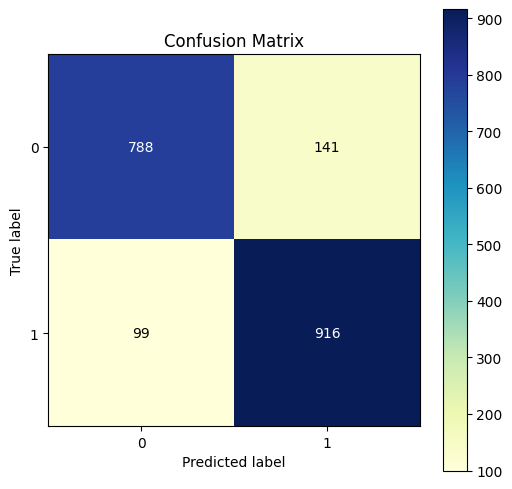

In [83]:
y_rf = pickled_model.predict(X_val)

y_prob_rf = rf.predict_proba(X_val)[:, 1]

skplt.metrics.plot_confusion_matrix(y_val, y_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_val, y_rf))
print('ROC AUC Score:', roc_auc_score(y_val, y_prob_rf))

In [84]:
data = {'Validate Output': y_val, 'Predicted Values': y_rf}

final_output = pd.DataFrame(data)
final_output.head()

final_output.to_csv('valset_with_preds.csv', index=False)